In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
import numpy.linalg as npl

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.size
    e = y - np.dot(tx, w)
    # MSE
#     L = np.dot(e.T, e) / (2*N)
    L = npl.norm(e, 2)** 2 / (2*N)
    # MAE
#     L = npl.norm(e, 1) / N
    return L

In [5]:
w = np.array([1, 2])
compute_loss(y, tx, w)

2694.483365887084

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))

    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, [w0[i], w1[j]])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.445 seconds


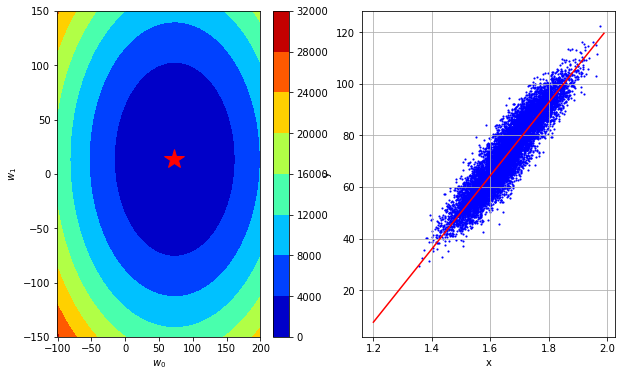

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    N = y.size
    e = y - np.dot(tx, w)
    gradL = - np.dot(tx.T, e) / N
    return gradL

In [9]:
w = [100, 20]
compute_gradient(y, tx, w)

array([26.706078  ,  6.52028757])

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591665, w0=7.3293922002105205, w1=1.347971243498896
Gradient Descent(1/49): loss=2264.6350560300025, w0=13.925845180399996, w1=2.5611453626479035
Gradient Descent(2/49): loss=1837.2777140793794, w0=19.862652862570513, w1=3.6530020698820147
Gradient Descent(3/49): loss=1491.1182670993753, w0=25.205779776523983, w1=4.63567310639271
Gradient Descent(4/49): loss=1210.7291150455712, w0=30.0145939990821, w1=5.520077039252342
Gradient Descent(5/49): loss=983.6139018819904, w0=34.3425267993844, w1=6.316040578826005
Gradient Descent(6/49): loss=799.6505792194905, w0=38.23766631965648, w1=7.032407764442302
Gradient Descent(7/49): loss=650.6402878628647, w0=41.74329188790136, w1=7.677138231496974
Gradient Descent(8/49): loss=529.9419518639979, w0=44.89835489932174, w1=8.257395651846178
Gradient Descent(9/49): loss=432.176299704916, w0=47.737911609600076, w1=8.779627330160464
Gradient Descent(10/49): loss=352.98612145605966, w0=50.29351264885059, w1=9.24963

Linear convergence!

In [12]:
import numpy.linalg as npl
n = 8
wf = gradient_ws[-1]

num = np.log(npl.norm(gradient_ws[n+2] - gradient_ws[n+3]) / npl.norm(gradient_ws[n+1] - gradient_ws[n+2]))
den = np.log(npl.norm(gradient_ws[n+1] - gradient_ws[n+2]) / npl.norm(gradient_ws[n] - gradient_ws[n+1]))
p = num / den
p

0.9999999999999578

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

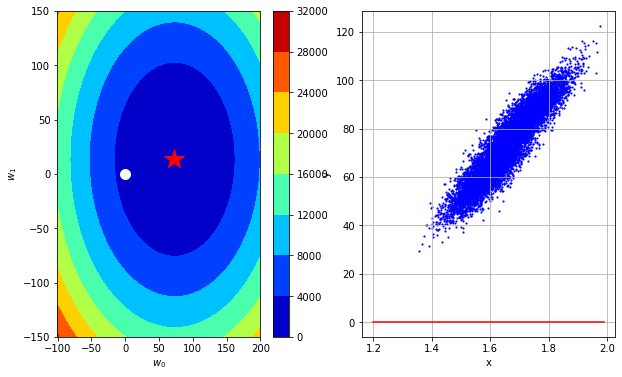

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    N = y.size
    e = y - np.dot(tx, w)
    gradL = -np.dot(tx.T, e) / N
    return gradL

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    w = initial_w
    ws = [w]
    losses = []
    for batch_y, batch_tx in batch_iter(y, tx, batch_size, max_iters):
        gradient = compute_stoch_gradient(batch_y, batch_tx, w)
        w = w - gamma * gradient
        ws.append(w)
        losses.append(compute_loss(y, tx, w))
    return losses, ws

In [16]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.005 seconds


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

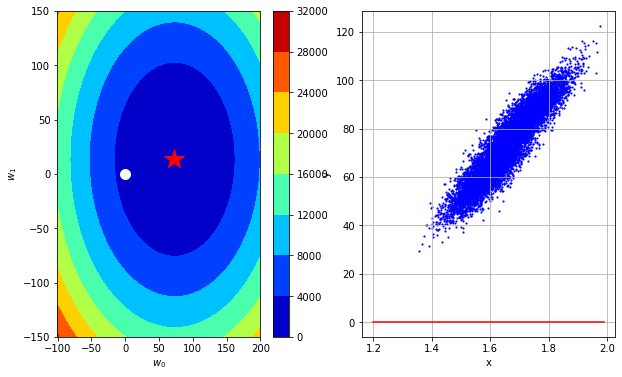

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers

### Exercise 5


Gradient Descent(0/49): loss=33.82174646540912, w0=66.84746409844843, w1=22.72442640619239
Gradient Descent(1/49): loss=9.431062716628187, w0=71.90170332798297, w1=14.541754328050093
Gradient Descent(2/49): loss=5.497213925287561, w0=73.41797509684335, w1=12.086952704607402
Gradient Descent(3/49): loss=6.155111153693625, w0=73.87285662750146, w1=11.350512217574593
Gradient Descent(4/49): loss=6.477266371789364, w0=74.00932108669889, w1=11.12958007146475
Gradient Descent(5/49): loss=6.588038288934323, w0=74.05026042445812, w1=11.063300427631797
Gradient Descent(6/49): loss=6.622362444234634, w0=74.06254222578589, w1=11.043416534481908
Gradient Descent(7/49): loss=6.632850635710716, w0=74.06622676618423, w1=11.037451366536944
Gradient Descent(8/49): loss=6.636022022367068, w0=74.06733212830372, w1=11.035661816153453
Gradient Descent(9/49): loss=6.636973438363972, w0=74.06766373693956, w1=11.035124951038407
Gradient Descent(10/49): loss=6.637258863163042, w0=74.06776321953032, w1=11.03496

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

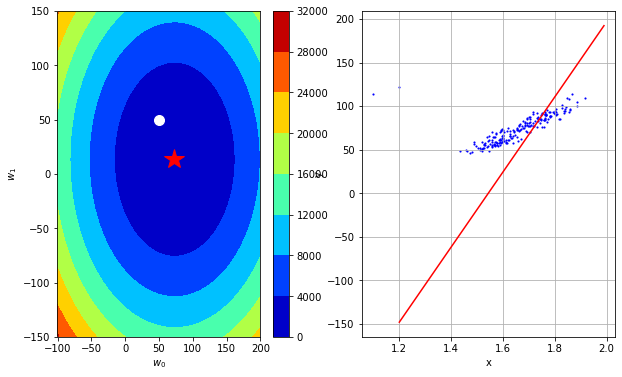

In [93]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# plt.scatter(height, weight)
# plt.grid()

max_iters = 50
gamma = 0.7
initial_w = np.array([50, 50])
gradient_losses, gradient_ws = gradient_descent(y, tx, initial_w, max_iters, gamma)

def plot_figure(n_iter):
    fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [80]:
def g(e):
    if(e>0):
        return 1
    elif(e<0):
        return -1
    else:
        return 0.5

vg = np.vectorize(g)

In [90]:
def compute_subgradient(y, tx, w):
    N = y.size
    e = y - np.dot(tx, w)
    subgradL = - np.dot(tx.T, vg(e)) / N
#     print(e, subgradL)
    return subgradL

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    N = y.size
    e = y - np.dot(tx, w)
    gradL = - np.dot(tx.T, e) / N
    return gradL

In [99]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        subgradient = compute_subgradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * subgradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Subgradient Descent(0/69): loss=33.82174646540912, w0=50.40990099009901, w1=49.41734240446291
Subgradient Descent(1/69): loss=33.25850177479595, w0=50.82871287128713, w1=48.84248810804131
Subgradient Descent(2/69): loss=32.6964341593085, w0=51.24752475247525, w1=48.26763381161971
Subgradient Descent(3/69): loss=32.13436654382105, w0=51.66633663366337, w1=47.69277951519811
Subgradient Descent(4/69): loss=31.572298928333602, w0=52.08514851485149, w1=47.11792521877651
Subgradient Descent(5/69): loss=31.010231312846155, w0=52.50396039603961, w1=46.543070922354914
Subgradient Descent(6/69): loss=30.44816369735871, w0=52.92277227722773, w1=45.968216625933316
Subgradient Descent(7/69): loss=29.886096081871255, w0=53.34158415841585, w1=45.39336232951172
Subgradient Descent(8/69): loss=29.32402846638381, w0=53.76039603960397, w1=44.81850803309012
Subgradient Descent(9/69): loss=28.76404616712272, w0=54.16138613861387, w1=44.234623550895535
Subgradient Descent(10/69): loss=28.206586002620934, w0

interactive(children=(IntSlider(value=1, description='n_iter', max=71, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

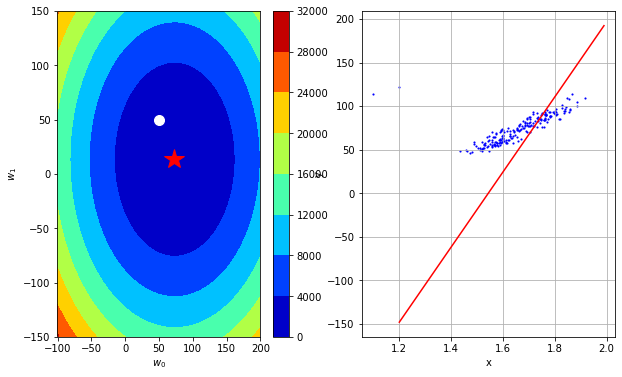

In [100]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# plt.scatter(height, weight)
# plt.grid()

max_iters = 70
gamma = 0.9
initial_w = np.array([50, 50])
subgradient_losses, subgradient_ws = subgradient_descent(y, tx, initial_w, max_iters, gamma)

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgradient_losses, subgradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgradient_ws)))

Più resistente agli outliers (statistical property), ma più lenta a convergere (computational property).
!Occorre partire con una stima diversa da (0, 0), perché altrimenti gradiente nullo a causa della normalizzazione dei pesi

In [103]:
def compute_stoch_subgradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    N = y.size
    e = y - np.dot(tx, w)
    gradL = -np.dot(tx.T, vg(e)) / N
    return gradL

def stochastic_subgradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    w = initial_w
    ws = [w]
    losses = []
    for batch_y, batch_tx in batch_iter(y, tx, batch_size, max_iters):
        gradient = compute_stoch_subgradient(batch_y, batch_tx, w)
        w = w - gamma * subgradient
        ws.append(w)
        losses.append(compute_loss(y, tx, w))
    return losses, ws

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

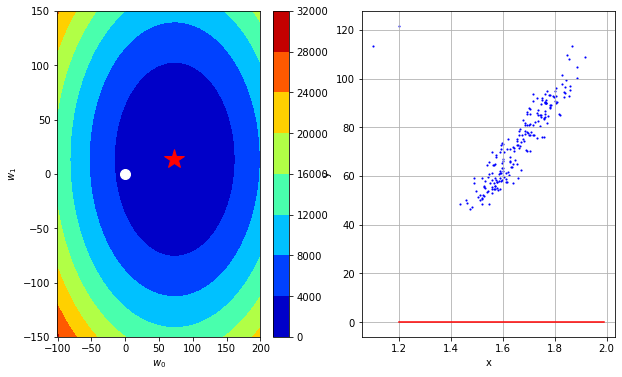

In [105]:
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))